In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Effect of rank on Query only as target module

In [51]:
# Read CSV files into DataFrames
csv_files = [r'out_setting8\results_with_std.csv', r'out_setting9\results_with_std.csv', r'out_setting10\results_with_std.csv', r'out_setting11\results_with_std.csv']
warmup_steps = [0, 100, 300, 500]
data_frames = []
for idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    warmup = warmup_steps[idx]
    df['task_name'] = df['task_name'].replace('sensemaking', 'comve')
    df['Warmup Steps'] = warmup

    data_frames.append(df)

# data_frames = [pd.read_csv(file) for file in csv_files]
concatenated_df = pd.concat(data_frames, ignore_index=True)


concatenated_df

,task_name,model_type,io_format,n_shots,dev_acc,dev_acc_std,dev_bertscore_correct_normalized,dev_bertscore_correct_normalized_std,seed,seed_std,Warmup Steps
0,ecqa,allenai/unifiedqa-t5-base,unifiedqa_matching,48,38.248244,2.534196,31.091276,2.062414,4678.590164,2924.814605,0
1,ecqa,allenai/unifiedqa-t5-large,unifiedqa_matching,48,39.238095,3.731341,31.946051,3.027966,4633.966667,2928.420991,0
2,esnli,t5-base,standard,16,56.968391,3.656179,51.665479,3.403645,4633.966667,2928.420991,0
3,esnli,t5-large,standard,16,84.966475,1.987744,77.752948,1.814379,4633.966667,2928.420991,0
4,sbic,allenai/unifiedqa-t5-base,unified_qa_what_with_tags,24,52.823810,3.839321,50.687460,3.625778,4633.966667,2928.420991,0
5,sbic,allenai/unifiedqa-t5-large,unified_qa_what_with_tags,24,60.823810,2.616583,57.867138,2.708999,4633.966667,2928.420991,0
6,comve,allenai/unifiedqa-t5-base,unifiedqa_what,24,55.457143,2.510224,50.687251,2.286580,4633.966667,2928.420991,0
7,comve,allenai/unifiedqa-t5-large,unifiedqa_what,24,65.933333,3.220414,60.484810,2.984643,4633.966667,2928.420991,0
8,ecqa,allenai/unifiedqa-t5-base,unifiedqa_matching,48,34.032258,2.959060,27.663198,2.407598,4571.225806,2901.225277,100
9,ecqa,allenai/unifiedqa-t5-large,unifiedqa_matching,48,31.628571,3.462648,26.026551,2.802585,4633.966667,2928.420991,100


In [24]:
# Read CSV files into DataFrames
csv_files_q = [r'out4q\results.csv', r'out8q\results.csv', r'out16q\results.csv', r'out32q\results.csv']
csv_files_v = [r'out4v\results.csv', r'out8v\results.csv', r'out16v\results.csv', r'out32v\results.csv']
csv_files_qv = [r'out4qv\results.csv', r'out8qv\results.csv', r'out16qv\results.csv', r'out32qv\results.csv']
all_csv_files = {'query':csv_files_q, 'value':csv_files_v, 'query_value':csv_files_qv}

concatenated_data_frames = {}

for tgt_module, csv_files in all_csv_files.items():
    data_frames = []
    for idx, file in enumerate(csv_files):
        df = pd.read_csv(file)
        df['task_name'] = df['task_name'].replace('sensemaking', 'comve')
        rank = 2 ** (idx+2)
        df['rank'] = rank

        data_frames.append(df)

    # data_frames = [pd.read_csv(file) for file in csv_files]
    concatenated_df = pd.concat(data_frames, ignore_index=True)

    concatenated_data_frames[tgt_module] = concatenated_df


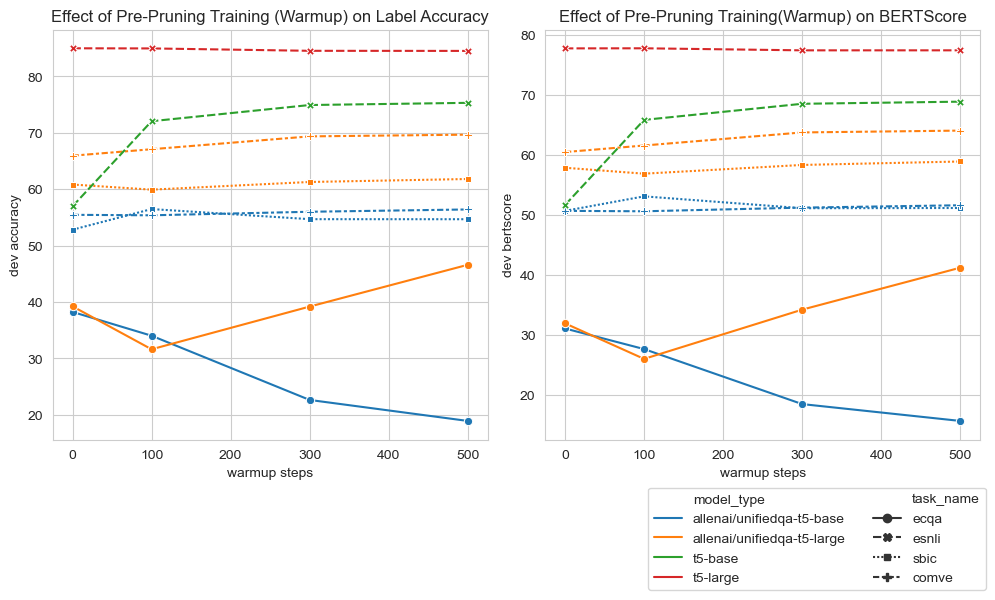

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()


# Loop through the subplots and plot your data in each
for i, ax in enumerate(axes):
    # Set up the plot for each subplot
    sns.set_palette("tab10")
    sns.set_style("whitegrid")
    
    # Create the plot using seaborn's lineplot
    if i == 0:
        sns.lineplot(data=concatenated_df, x='Warmup Steps', y='dev_acc', hue='model_type', style='task_name', markers=True, ax=ax)
        ax_ylabel = 'dev accuracy'
        ax_title = 'Effect of Pre-Pruning Training (Warmup) on Label Accuracy'
    else:
        sns.lineplot(data=concatenated_df, x='Warmup Steps', y='dev_bertscore_correct_normalized', hue='model_type', style='task_name', markers=True, ax=ax)
        ax_ylabel = 'dev bertscore'
        ax_title = 'Effect of Pre-Pruning Training(Warmup) on BERTScore'
    
    # Set labels and title for the subplot
    ax.set_xlabel('warmup steps')
    ax.set_ylabel(ax_ylabel)
    ax.set_title(ax_title)  
    
    # Remove the legend from each subplot
    ax.legend().set_visible(False)
    
# Adjust layout to avoid overlap
plt.tight_layout()

# Create a single legend outside the subplots with adjusted dimensions
legend = plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2,
                    bbox_transform=plt.gcf().transFigure, frameon=True)  # Adjust bbox_to_anchor, ncol, and dimensions as needed

# Set the dimensions of the legend box
legend.set_bbox_to_anchor([0.5, -0.15, 0.25, 0.05])  # Adjust the dimensions as needed
# Create a suptitle for the entire figure
# plt.suptitle('Effect of Rank on Model Performance when LoRA is applied to Different Target Modules', fontsize=16, y=-0.15, va='bottom')

plt.savefig('adalora_plot.pdf', bbox_inches='tight')
# Show the entire figure
plt.show()